# Exploratory Data Analysis (EDA) – NYC Daily Ambulance Call Prediction

## Introduction
This notebook performs an extensive Exploratory Data Analysis (EDA) on the **daily_amb_calls** dataset, which contains daily ambulance call counts in New York City along with relevant explanatory variables such as weather conditions, temporal features, and lagged values.  
The primary goal of this EDA is to:
- Understand the distribution and behavior of the target variable (`daily_call_count`).
- Identify trends, seasonality, and anomalies in ambulance call patterns.
- Explore the influence of weather and other external factors.
- Assess relationships between features and the target for potential modeling.
- Detect missing data, outliers, and data quality issues.
- Generate actionable insights for feature engineering and model selection.

## Dataset Overview
The dataset contains:
- **Date**: Calendar day of the observation.
- **Target variable**: `daily_call_count` – number of ambulance calls recorded on a given day.
- **Weather features**: Temperature, precipitation, snowfall, snow_depth, etc.
- **Temporal features**: Day of week, month, weekend, holidays.
- **Lag features**: Call counts from prior days to capture autocorrelation.

The data has already undergone initial cleaning and merging from multiple sources.

## EDA Roadmap
1. **Data Structure & Quality Checks**  
   Inspect dataset dimensions, data types, missing values, duplicates, and date continuity.

2. **Univariate Analysis**  
   Examine distributions and summary statistics of individual variables, focusing on the target variable.

3. **Time Series Exploration**  
   Analyze long-term trends, seasonality, day-of-week and monthly patterns.

4. **Weather Feature Analysis**  
   Investigate correlations and visualize the effect of weather conditions on call volumes.

5. **Lag Feature Examination**  
   Explore autocorrelation patterns and lag variable relevance.

6. **Interaction Effects**  
   Study combined effects (e.g., weather × day-of-week) on call counts.

7. **Outlier & Anomaly Detection**  
   Identify days with unusually high or low call counts and potential causes.


## Expected Outcomes
By the end of this EDA, we will have:
- A deep understanding of data patterns and relationships.
- Identification of potential predictive features.
- A list of anomalies and data quality issues to address.
- Visual and statistical evidence to guide feature engineering and model selection.

## Setup and Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings

sns.set(style='whitegrid', palette='bright', font_scale=1.1)

In [4]:
# Load Data 
df = pd.read_csv('daily_ambulance_calls.csv')
df.head()

,Unnamed: 0,date,borough,daily_call_vol,mean_severity_level,max_severity_level,min_severity,day_of_week,is_weekend,is_holiday,lag_1,lag_7,precp,snowfall,temp
0,0,2024-07-01,Bronx,1039,4.216554,1,8,0,0,0,1021.557047,1020.561644,0.4,0.0,70.34
1,1,2024-07-02,Bronx,950,4.195789,1,8,1,0,0,1039.000000,1020.561644,0.0,0.0,71.87
2,2,2024-07-03,Bronx,1002,4.229541,1,8,2,0,0,950.000000,1020.561644,0.0,0.0,71.87
3,3,2024-07-04,Bronx,907,4.060639,1,8,3,0,1,1002.000000,1020.561644,1.3,0.0,75.47
4,4,2024-07-05,Bronx,1099,4.270246,1,8,4,0,0,907.000000,1020.561644,15.6,0.0,78.71


## Data Structure & Quality Checks

In [5]:
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# sort dates
df = df.sort_values('date')

In [6]:
# Data structure and quality check
print('Shape :',df.shape)
print(df.dtypes)


Shape : (1495, 15)
Unnamed: 0                      int64
date                   datetime64[ns]
borough                        object
daily_call_vol                  int64
mean_severity_level           float64
max_severity_level              int64
min_severity                    int64
day_of_week                     int64
is_weekend                      int64
is_holiday                      int64
lag_1                         float64
lag_7                         float64
precp                         float64
snowfall                      float64
temp                          float64
dtype: object


The dataset’s data types are appropriate for exploratory data analysis. The 'date' column is in datetime format, which is suitable for time series operations, while 'borough' is an object type and can be treated as categorical for analysis. All numerical columns are correctly stored as int64 or float64, accurately representing counts and measurements. The only exception is the 'Unnamed: 0' column, which is an unnecessary index column and will be dropped to streamline the dataset.

In [7]:
# Drop 'unnamed' column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,date,borough,daily_call_vol,mean_severity_level,max_severity_level,min_severity,day_of_week,is_weekend,is_holiday,lag_1,lag_7,precp,snowfall,temp
0,2024-07-01,Bronx,1039,4.216554,1,8,0,0,0,1021.557047,1020.561644,0.4,0.0,70.34
299,2024-07-01,Brooklyn,1266,4.274882,1,8,0,0,0,1192.063758,1191.236301,0.2,0.0,71.06
897,2024-07-01,Queens,914,4.250547,1,8,0,0,0,866.768456,866.753425,0.1,0.0,70.25
598,2024-07-01,Manhattan,1200,4.276667,1,8,0,0,0,1046.201342,1045.691781,0.2,0.0,70.43
1196,2024-07-01,Staten Island,167,4.233533,1,7,0,0,0,180.023490,179.811644,0.5,0.0,71.42


### Check for Missing Values

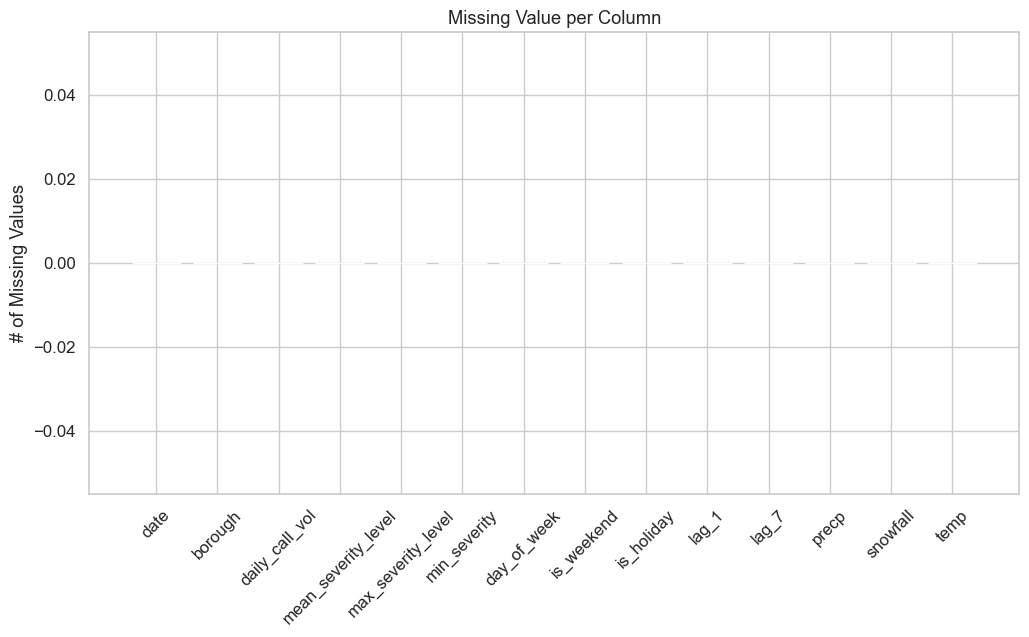

In [8]:
missing_vals = df.isna().sum()

# Bar plot 
plt.figure(figsize=(12,6))
plt.bar(missing_vals.index, missing_vals.values)
plt.ylabel('# of Missing Values')
plt.xticks(rotation=45)
plt.title('Missing Value per Column')
plt.show()

__All columns in the dataset have complete data; there are **no missing values**. Therefore, no imputation or cleaning is required for missing data.__

### Check for Duplicates

In [9]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


### Check for missing dates

Returned an empty list, so every date from max to min is present.

In [10]:
date_range = pd.date_range(df.date.min(), df.date.max())
missing_dates = date_range.difference(df.date)
print('Missing dates :', missing_dates)

Missing dates : DatetimeIndex([], dtype='datetime64[ns]', freq='D')


### Univariate analysis of target variable `daily_call_vol`

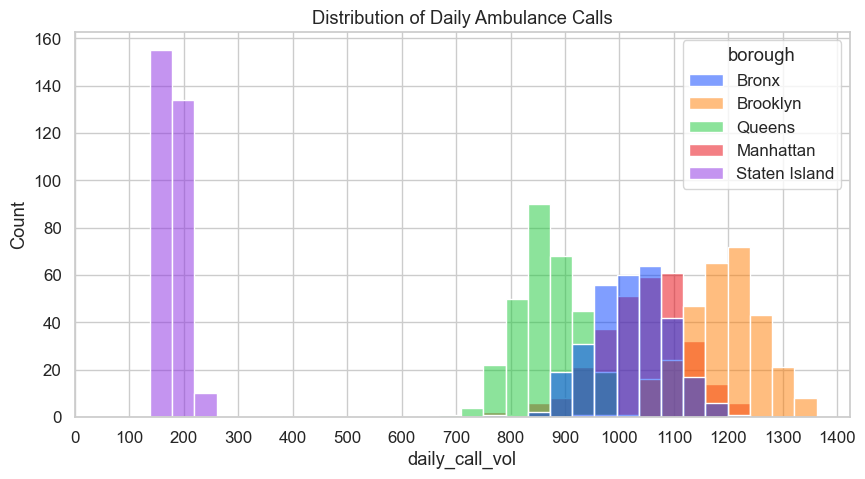

In [11]:
# Plot `daily_call_vol` distribution

plt.figure(figsize=(10,5))
sns.histplot(x='daily_call_vol', hue='borough', data=df, palette='bright', kde=False, bins=30)
plt.title('Distribution of Daily Ambulance Calls')
plt.xticks(range(0,1401,100))
plt.show()

In [12]:
# Summary statistics of daily_call_vol

df.daily_call_vol.describe()

count    1495.000000
mean      861.197993
std       361.562831
min       138.000000
25%       827.000000
50%       984.000000
75%      1102.500000
max      1362.000000
Name: daily_call_vol, dtype: float64

The distribution of daily ambulance calls shows a bimodal pattern. Most days have relatively low counts, typically under 200 calls. There is a gap in the distribution between approximately 300–700 calls, where no days occur. Beyond that, call counts vary between roughly 700–1300, indicating periods of higher and more variable demand. The dataset has 1495 observations, with a mean daily call volume of approximately 861 and a standard deviation of 361. The minimum and maximum daily calls are 138 and 1362, respectively, while the 25th, 50th (median), and 75th percentiles are 827, 984, and 1102. This distribution suggests two distinct clusters of days — one with low call volumes and another with high call volumes.

The distribution of daily ambulance calls varies noticeably across boroughs. Staten Island typically experiences lower call volumes, around 200 calls per day. Queens sees moderate daily volumes, usually in the 700–900 range. Manhattan and Bronx have higher call volumes, with Manhattan mostly between 850–1050 calls and Bronx between 800–1200 calls. Brooklyn consistently has the highest daily volumes, ranging roughly from 1100–1350 calls. This indicates a clear spatial variation in ambulance demand across NYC, with Brooklyn and the Bronx having the heaviest daily loads, while Staten Island has the lightest.


## Time series plot of Daily ambulance calls by borough

Rolling averages help smooth out daily noise in the data and make long-term patterns easier to see. A 7-day rolling mean averages a full week of data, reducing spikes from random events or weekends. This way, we can spot real trends in ambulance demand across boroughs without being distracted by short-term fluctuations.

In [13]:
# Compute rolling averages in new dataframe 

rolling_df = df.copy()

rolling_df = rolling_df.sort_values(['borough', 'date'])


rolling_df['rolling_7'] = (rolling_df.groupby('borough')['daily_call_vol']
                                    .transform(lambda x: x.rolling(7, min_periods=1).mean()))

rolling_df.head()

,date,borough,daily_call_vol,mean_severity_level,max_severity_level,min_severity,day_of_week,is_weekend,is_holiday,lag_1,lag_7,precp,snowfall,temp,rolling_7
0,2024-07-01,Bronx,1039,4.216554,1,8,0,0,0,1021.557047,1020.561644,0.4,0.0,70.34,1039.0
1,2024-07-02,Bronx,950,4.195789,1,8,1,0,0,1039.000000,1020.561644,0.0,0.0,71.87,994.5
2,2024-07-03,Bronx,1002,4.229541,1,8,2,0,0,950.000000,1020.561644,0.0,0.0,71.87,997.0
3,2024-07-04,Bronx,907,4.060639,1,8,3,0,1,1002.000000,1020.561644,1.3,0.0,75.47,974.5
4,2024-07-05,Bronx,1099,4.270246,1,8,4,0,0,907.000000,1020.561644,15.6,0.0,78.71,999.4


### Plot Daily ambulance calls and 7-day rolling average

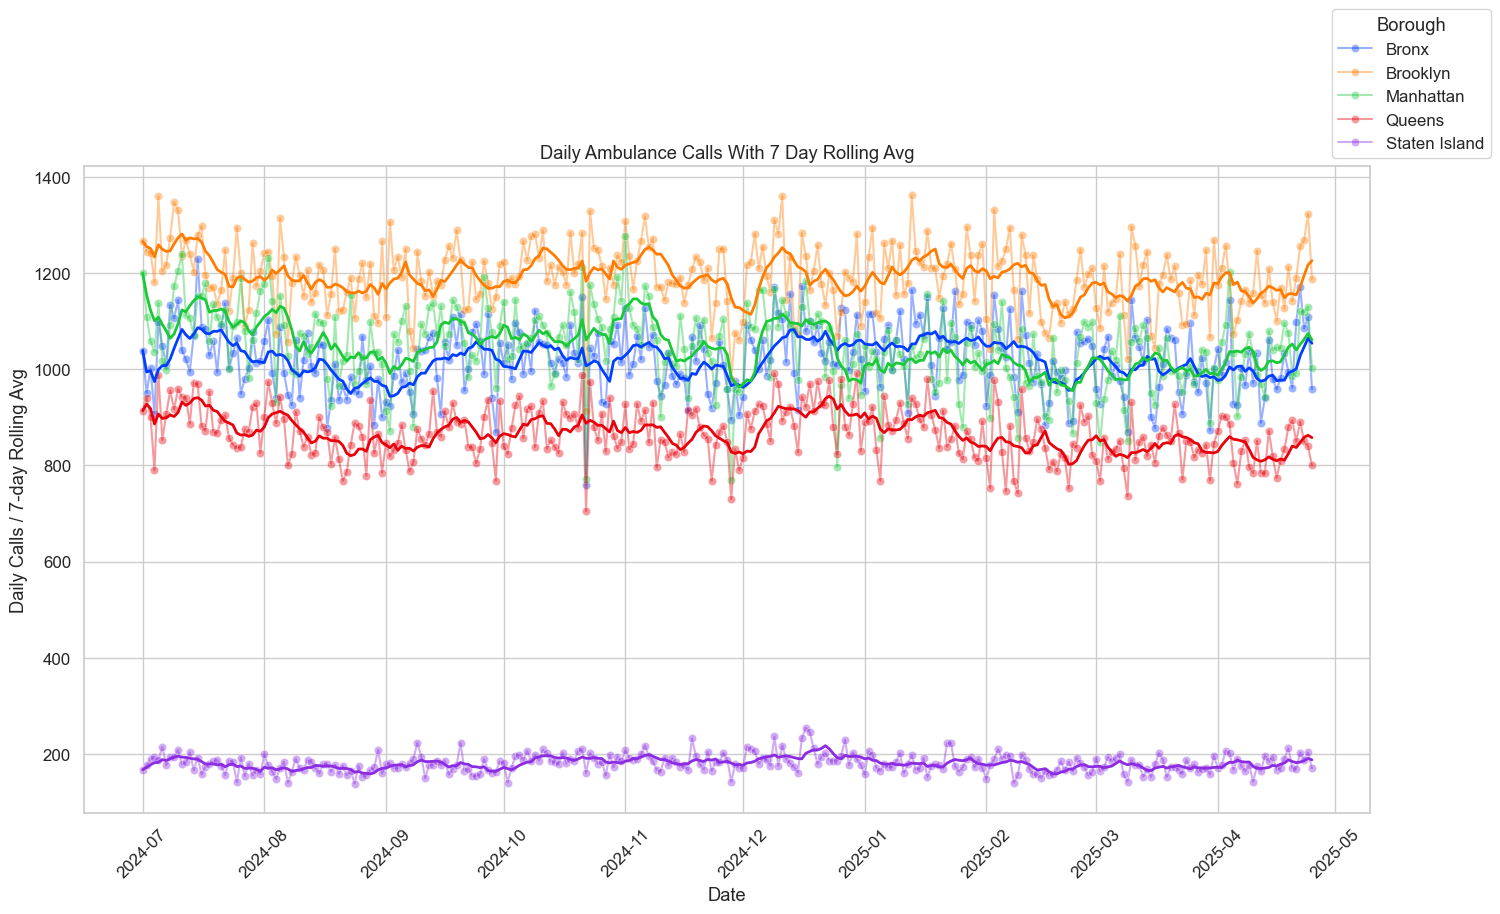

In [15]:

# Plot 1 day rolling

plt.figure(figsize=(14,8))
sns.lineplot(x='date',y='daily_call_vol', data=rolling_df, hue='borough', alpha=0.4, marker='o')

# plot 7 day rolling

sns.lineplot(x='date', y='rolling_7', data=rolling_df, hue = 'borough', alpha=1,linewidth=2, legend=False)

plt.xlabel('Date')
plt.ylabel('Daily Calls / 7-day Rolling Avg')
plt.title('Daily Ambulance Calls With 7 Day Rolling Avg')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Borough',bbox_to_anchor=(1.1,1.0), loc='lower right')
plt.show()

The Time series plot shows daily ambulance call volumes across NYC boroughs along with their 7-day rolling averages.
The daily series (light lines with dots) is highly volatile, with frequent spikes and drops that make it difficult to identify broader patterns.
The 7-day rolling average (thicker lines) smooths out this short-term noise, revealing clearer borough-level trends.
Brooklyn consistently record the highest call volumes, with a slight upward trend over the period.
Manhattan, Bronx, and Queens remain relatively stable, while Staten Island has the lowest and flattest trend.
The smoothing effect helps highlight systematic weekly patterns - fluctuations in the raw data may be due to weekend effects, holidays, or special events when ambulance demand is not evenly distributed across days.

### Day-of -Week Patterns in Ambulance Call Volume

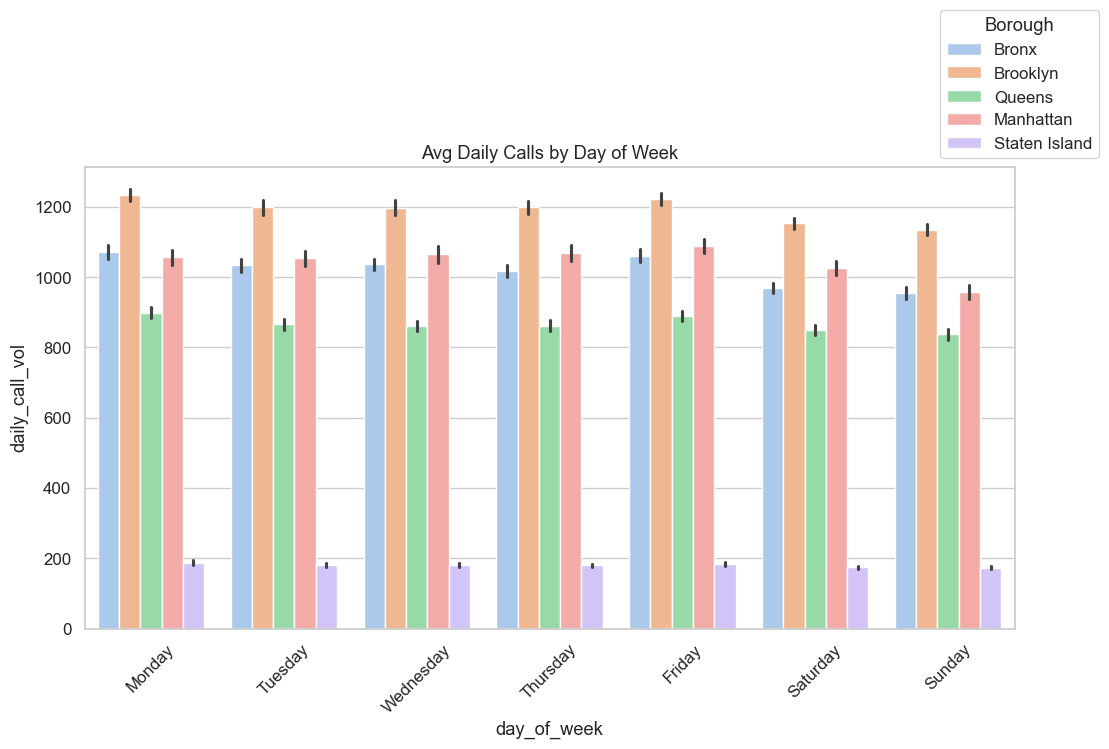

In [16]:
# Plot Ambulanace Calls by Day-of-Week

weekday_df = df.copy()
weekday_df['day_of_week'] = weekday_df['date'].dt.day_name()

# Plot Barplot
plt.figure(figsize=(12,6))
sns.barplot(x='day_of_week', y='daily_call_vol', hue='borough', palette='pastel', data=weekday_df,
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
plt.xticks(rotation=45)
plt.title('Avg Daily Calls by Day of Week')
plt.legend(title='Borough', bbox_to_anchor=(1.1,1.0), loc='lower right')           
plt.show()

This plot shows the average ambulance calls for each day of the week to check if certain days consistently have higher or lower demand.  
Unlike the daily time-series plot (which shows sharp fluctuations), this view smooths out random spikes by averaging each weekday across all weeks.  
The purpose is to highlight any systematic weekly patterns, while the line plot captures short-term day-to-day variability.  
Together, both views help distinguish between noise and consistent trends in demand.

### Comparing Daily Call Volume : Weekday Vs Weekend Vs Holiday

In [17]:
# Creat a function identify weekday,weekend and holiday

def category(row):
    if row['is_holiday']==1 and row['is_weekend']==1:
        return 'Holiday (Weekend)'
    elif row['is_holiday']==1:
        return 'Holiday'
    elif row['is_weekend']==1:
        return 'Weekend'
    else:
        return 'Weekday'
df['call_category']=df.apply(category, axis=1)

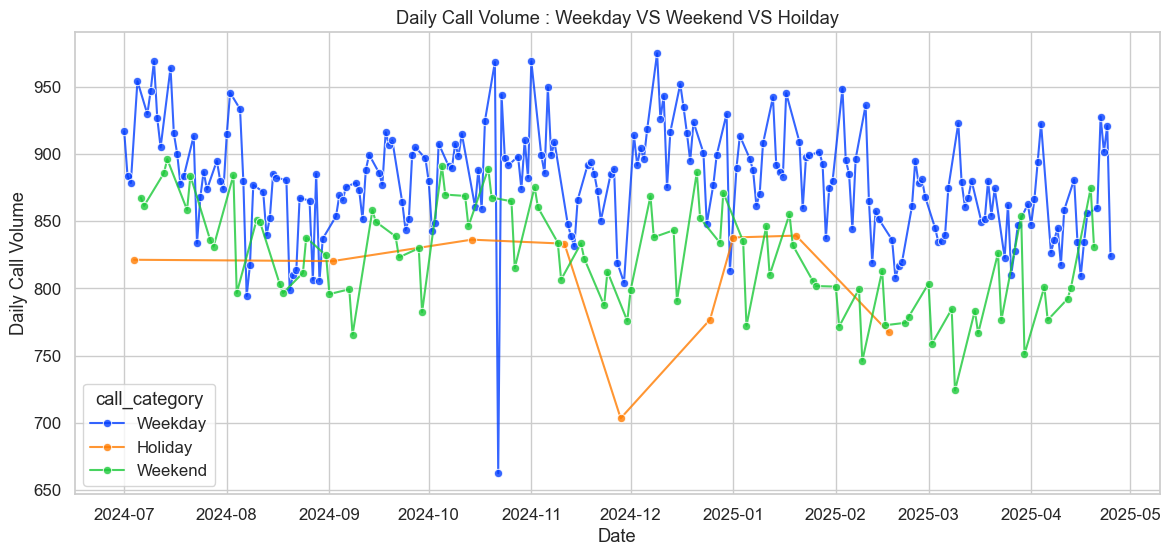

In [18]:
# plot  

plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='daily_call_vol', data=df, hue='call_category', marker='o', alpha=0.8, errorbar=None)
plt.xlabel('Date')
plt.ylabel('Daily Call Volume')
plt.title('Daily Call Volume : Weekday VS Weekend VS Hoilday')
plt.show()

Daily Call Volume Chart shows Weekdays consistently show higher call volumes.
Weekend calls are generally lower but occasionally overlap with weekday volumes.
Holiday calls are sparse, reflecting reduced activity on federal holidays.
This visualization confirms the expected weekly pattern in ambulance demand and highlights potential temporal effects for modeling.

### Weather VS Daily Ambulance calls 

**Compare how weahter variables like temperature, precipitation, snowfall, and snow depth relate to `daily_call_vol`**

**Pairplot of weather features in the dataset.**

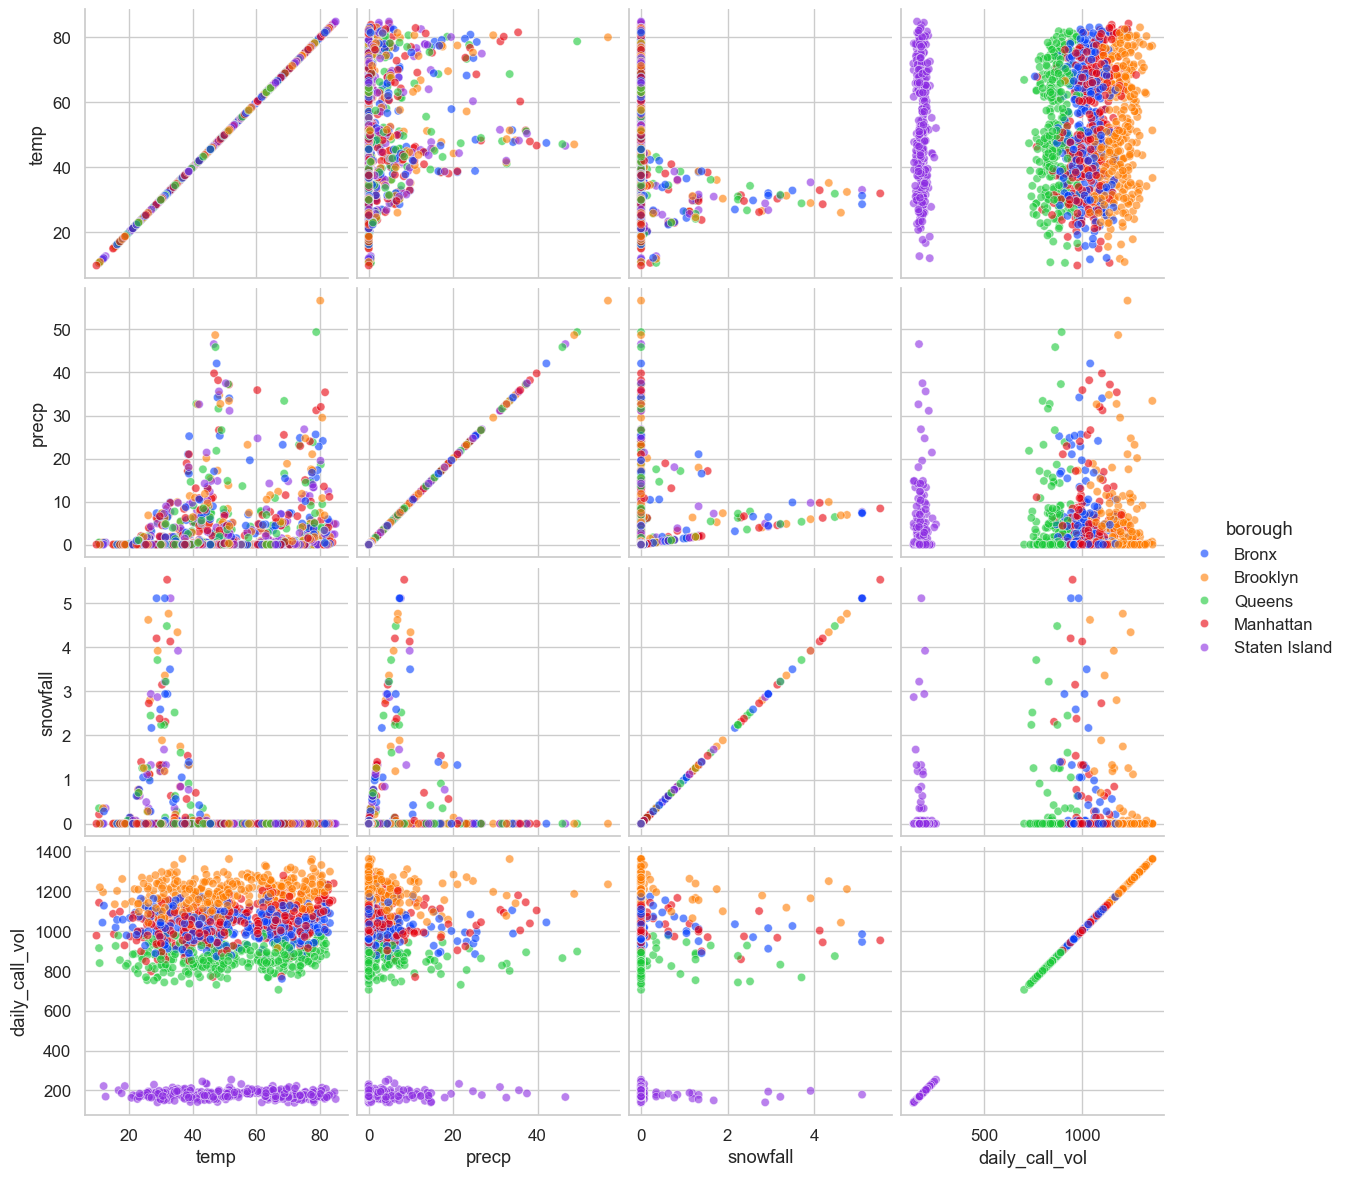

In [19]:
weather_features = ['temp', 'precp', 'snowfall', 'daily_call_vol','borough']

sns.pairplot(df[weather_features], hue='borough',plot_kws={'alpha':0.6}, diag_kind=None, height=3)

**Plot Heatmap of Weather features**

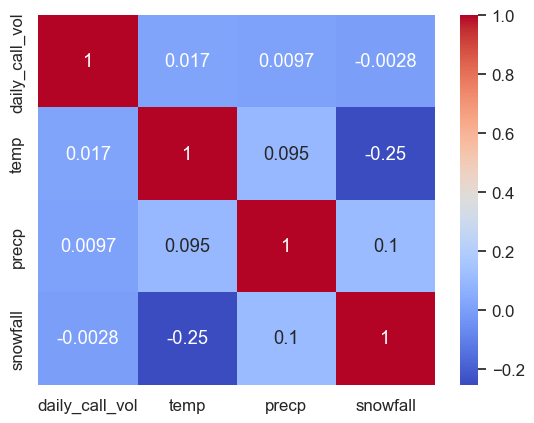

In [20]:
# Heatmap

weather_cols=['daily_call_vol','temp','precp','snowfall']

sns.heatmap(df[weather_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

The pairplot and heatmap of weather features (temp, precp, and snowfall) against daily ambulance calls show little to no visible relationship. The heatmap correlation values are all close to zero, indicating that none of the weather variables have a strong linear association with call volume. The pairplot further confirms this, with scatterplots showing no clear trend or pattern between calls and weather features.

## KDE (Kernel Density Estimate) Plots

KDE plots to visualize the distribution of ambulance calls across weather features because they provide a smoothed view of the data, unlike scatter plots or raw counts.

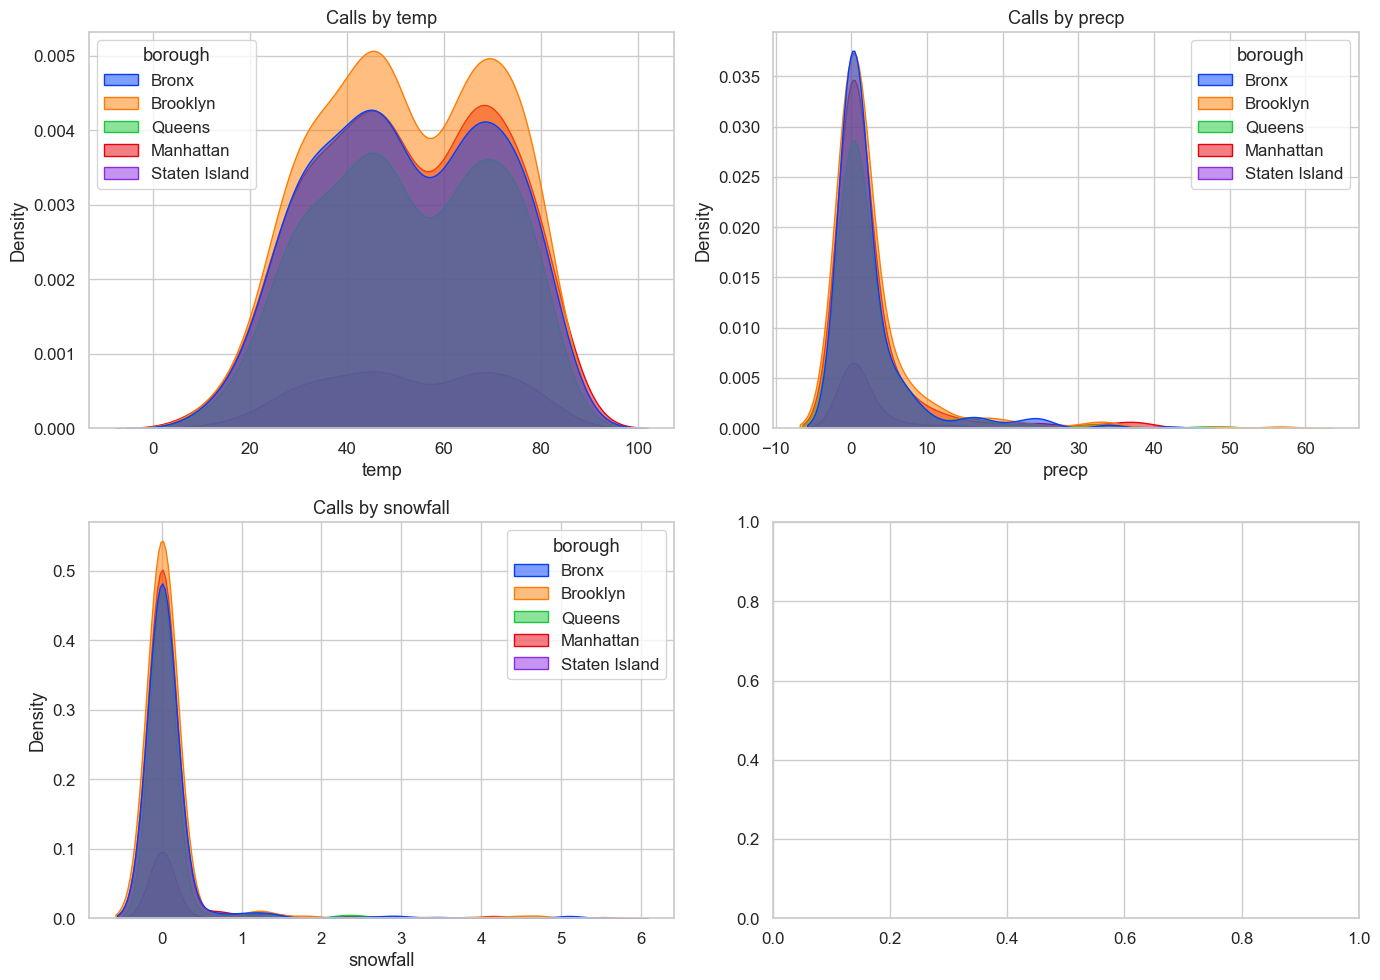

In [21]:
features = ["temp", "precp", "snowfall"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
axes = axes.flatten()
for i, feat in enumerate(features):
    sns.kdeplot(
        data=df, 
        x=feat, 
        weights=df['daily_call_vol'],  
        hue='borough',                
        fill=True, 
        alpha=0.5, 
        ax=axes[i]
    )
    axes[i].set_title(f"Calls by {feat}")
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel("Density")

plt.tight_layout()
plt.show()

Density distributions reveal clear clusters and nonlinear effects. Most calls happen on moderate temperature, dry, and snow-free days, highlighting patterns that are not captured by simple linear models.  
Temperature (temp): Most ambulance calls occur in the moderate range (20–50°F), with lower density at extreme cold or hot temperatures.  
Precipitation (precp): Higher call density appears on dry to lightly rainy days (0–0.5 inches), dropping as rainfall increases.  
Snowfall: Most calls happen on days with 0 inches of snowfall, with very few calls on snowy days.  
 

## Lag Feature analysis

**lag_1 represents the number of calls from yesterday, capturing short-term daily patterns.**  
**lag_7 represents the number of calls from the same day last week, capturing weekly seasonality.**

**Scatterplot of `lag_1`, `lag_7` and `daily_call_vol` to see realtionship**

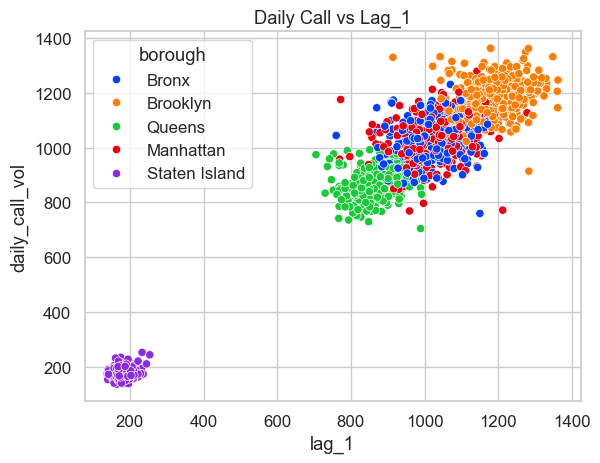

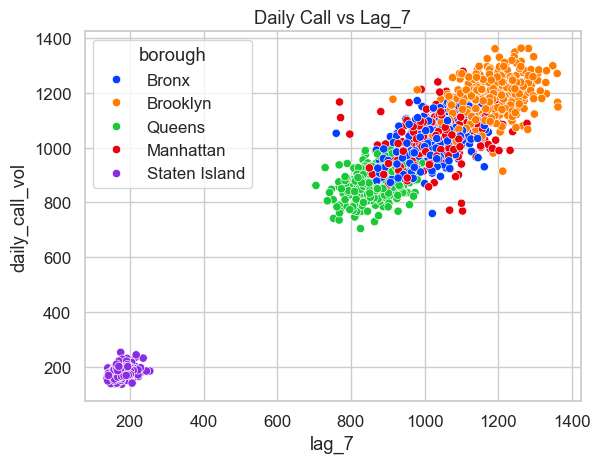

In [22]:
# scatterplot lag_1 vs daily_call_vol

sns.scatterplot(data=df, x='lag_1', y='daily_call_vol', hue='borough')
plt.title('Daily Call vs Lag_1')
plt.show()

# catterplot lag_7 vs daily_call_vol

sns.scatterplot(data=df, x='lag_7', y='daily_call_vol',hue='borough')
plt.title('Daily Call vs Lag_7')
plt.show()

Scatter plots of lag_1 and lag_7 against daily_call_vol show that both lag features are almost identical, indicating very strong short-term and weekly autocorrelation in daily call volume.

**Heatmap of `lag_1`, `lag_7` and `daily_call_vol`**

<Axes: >

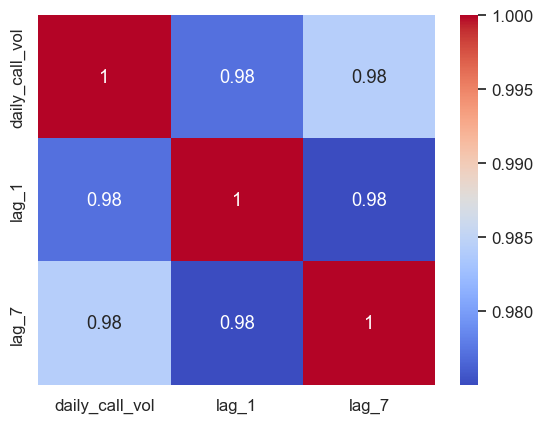

In [120]:
# Heatmap

sns.heatmap(df[['daily_call_vol', 'lag_1', 'lag_7']].corr(), cmap='coolwarm', annot=True)

Both lag features are highly correlated with the target, as expected for time series data with stable daily and weekly patterns.lag_1 and lag_7 themselves are strongly correlated (0.975), indicating redundancy.


## Examine Interaction Effects (Weather x Day of Week)

While individual features (like temperature or day-of-week) may show little or no direct correlation with ambulance call volume, their combined influence can still matter. For example, weather conditions might have a stronger impact on weekends than weekdays. Exploring interaction effects helps reveal these conditional relationships that are not visible in simple pairwise analysis. Even if not fully explored in EDA, interaction effects are important to consider during modeling.


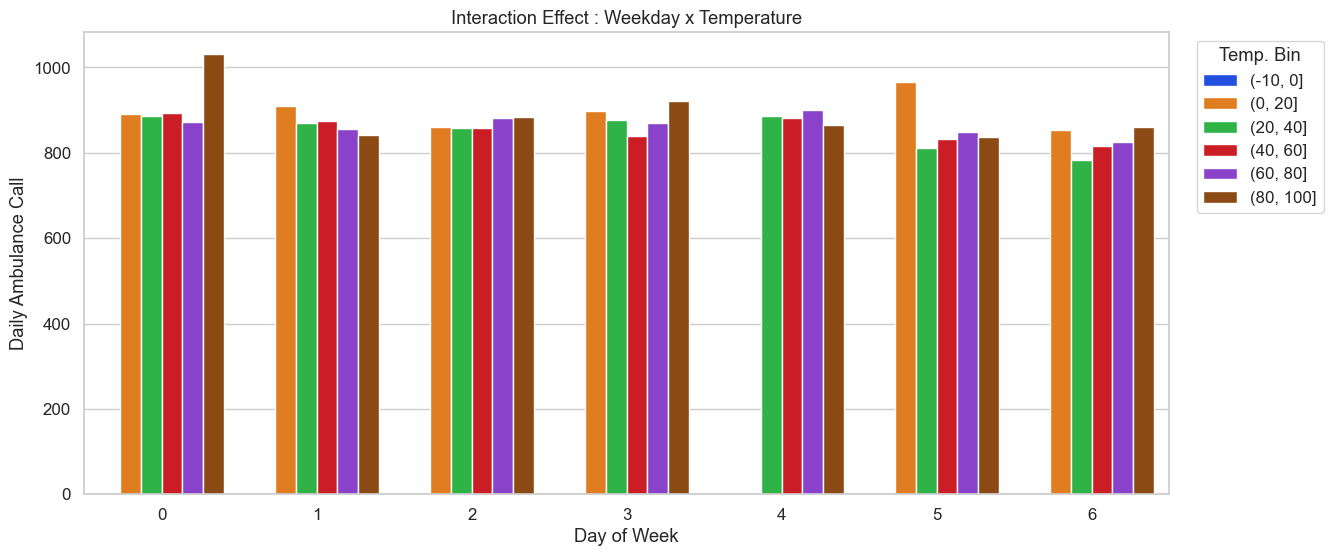

In [23]:
# Create temperature bins in new df

df_temp_day = df.copy()
df_temp_day['temp_bin'] = pd.cut(df_temp_day.temp, bins=[-10,0,20,40,60,80,100])

# Plot Barplot showing Interaction effects of weekday x temperature 

plt.figure(figsize=(14,6))
sns.barplot(x='day_of_week', y='daily_call_vol', data=df_temp_day, hue='temp_bin', errorbar=None)
plt.xlabel('Day of Week')
plt.ylabel('Daily Ambulance Call')
plt.title('Interaction Effect : Weekday x Temperature')
plt.legend(title='Temp. Bin', bbox_to_anchor=(1.15,1.0), loc='upper right')
plt.show()

The Barplot shows no strong interaction effect, Weekday shows stronger effect while Temaperature adds small variation to the daily calls.  

## Handling Outliers

**Boxplot : Daily Call Volume by Call Category and Borough**

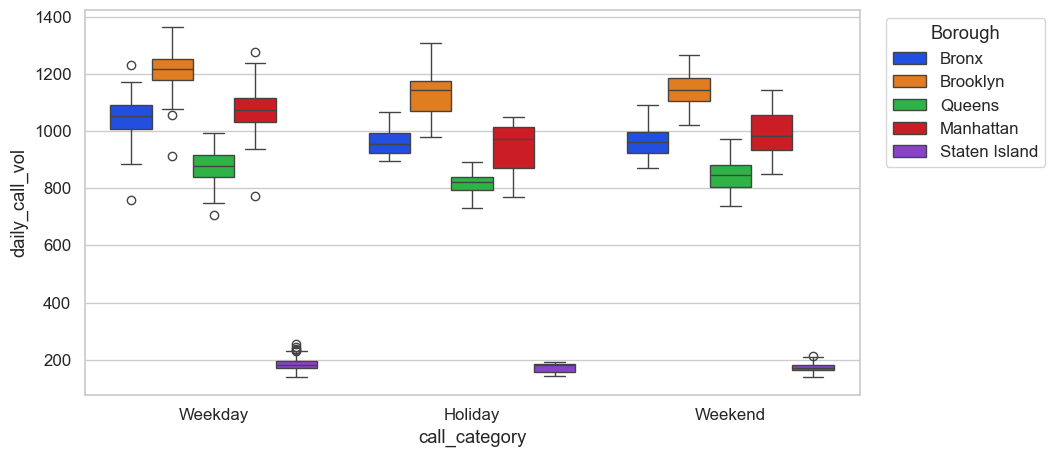

In [24]:
# Boxplot using call_caegory created earlier in ln[15]

plt.figure(figsize=(10,5))
sns.boxplot(x='call_category',y='daily_call_vol',data=df, hue='borough')
plt.legend(title='Borough', bbox_to_anchor=(1.25,1.0), loc='upper right')
plt.show()

Boxplots of daily call volume across boroughs and call categories (weekday, weekend, holiday). The boxplots show that the data is well-distributed within the interquartile range (IQR) for all boroughs. a few outliers are visible in **weekday call volumes** for the boroughs **Bronx**, **Queens**, **Manhattan**, and **Staten Island**. We will 
leave the outliers as they are. They likely represent real spikes in ambulance calls and could be important signals for modeling rather than noise.

Algorithms like **XGBoost** are robust to outliers, so keeping these spikes allows the model to learn patterns from unusually high call volumes without distorting predictions.

## EDA Summary

__Daily ambulance calls show a bimodal distribution, with low-demand days under 200 calls and high-demand days between 700–1300 calls (mean 861 ,std 361).  
Spatial variation is clear: Brooklyn and Bronx have the highest call volumes, Staten Island the lowest.  
Temporal patterns show higher calls on weekdays, lower on weekends and holidays, with 7-day rolling averages highlighting smoother borough-level trends.  
Weather variables (temperature, precipitation, snowfall) have minimal linear impact; most calls occur on moderate, dry, snow-free days.  
Lag features (lag_1 and lag_7) are highly correlated with daily calls, capturing strong short-term and weekly patterns, with no significant outliers observed.__   

__Temporal and spatial trends, along with lag features, dominate ambulance demand; weather has little linear effect.__

__The data is clean, well-structured, and ready for modeling.__